# 方法的合理性

1. 数据归一化方法放入缺陷
2. 数据标准化方法的应用
3. 曼哈顿距离、切比雪夫距离和闵可夫斯基距离

## 归一化的特殊情况

当存在一条数据的数值远远大于其他数值（可能是异常值）时，就会把大部分数据之间的差距趋近于零，无法区分。

**数据量很大，存在很多异常点数据集时，最大最小归一化并不合适**

### 数据标准化方法

x-平均值/标准差 = 标准化数值

**可正可负（不限于0到1之间），大多会聚集在0左右，越靠近于0说明越接近于平均值**

用法与MinMaxScaler相同
1. 调用fit_transform对训练集数据标准化
2. 调用transform对需要预测的数据集标准化

## 不同的距离算法

### 曼哈顿距离

唯独之间的差距绝对值之和

### 切比雪夫距离

选差距最大的维度，作为两者之间的实际距离

### 闵可夫斯基距离

设置p值
* p=2时，就是欧氏距离
* p=1时，就是曼哈顿距离
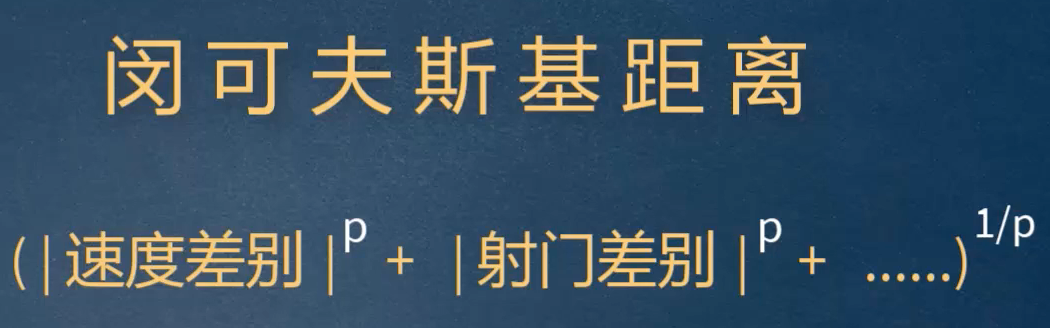

In [2]:
import pandas as pd
df = pd.read_excel('pokemon_knn.xlsx')
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,妙蛙种子,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,49,49,0.7,45,65,65,45,6.9
1,妙蛙草,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,62,63,1.0,60,80,80,60,13.0
2,妙蛙花,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,100,123,2.0,80,122,120,80,100.0
3,小火龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,52,43,0.6,39,60,50,65,8.5
4,火恐龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,64,58,1.1,58,80,65,80,19.0


In [1]:
from sklearn.preprocessing import StandardScaler

In [3]:
sds = StandardScaler()
sds.fit_transform(df.iloc[:,2:20])

array([[ 0.01380537, -0.05886473,  0.067622  , ..., -0.39360138,
         0.0337682 , -0.89617091],
       [ 0.01380537, -0.05886473,  0.067622  , ..., -0.39360138,
         0.0337682 , -0.89617091],
       [ 0.01380537, -0.05886473,  0.067622  , ..., -0.39360138,
         0.0337682 , -0.89617091],
       ...,
       [ 0.01380537, -0.05886473,  3.03876369, ..., -0.39360138,
         0.0337682 , -0.89617091],
       [-0.83012278, -1.37257594,  3.03876369, ..., -1.11324188,
         0.0337682 , -0.89617091],
       [-0.83012278, -1.37257594,  3.03876369, ..., -1.11324188,
         0.0337682 , -0.89617091]])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

x = df.iloc[:,2:20]
y = df['主分类']

# 计算闵可夫斯基距离，手动设置p值
# 表示无穷大，float('inf')
# knn = KNeighborsClassifier(n_neighbors=5, p=float('inf'))

knn = KNeighborsClassifier()

gscv = GridSearchCV(knn, {'n_neighbors':range(1,10,2),'p':[1,2,float('inf')]}, cv=3)

gscv.fit(x,y)

pd.DataFrame(gscv.cv_results_)
#model = knn.fit(x,y)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006698,0.002092,0.020149,0.003291,1,1,"{'n_neighbors': 1, 'p': 1}",0.885106,0.850427,0.837607,0.857714,0.020064,1
1,0.005117,0.000209,0.014232,0.000329,1,2,"{'n_neighbors': 1, 'p': 2}",0.872340,0.841880,0.833333,0.849185,0.016741,2
2,0.004943,0.000606,0.013661,0.000567,1,inf,"{'n_neighbors': 1, 'p': inf}",0.846809,0.833333,0.769231,0.816458,0.033844,5
3,0.004548,0.000143,0.016722,0.000238,3,1,"{'n_neighbors': 3, 'p': 1}",0.859574,0.820513,0.786325,0.822137,0.029926,3
4,0.005014,0.000699,0.017333,0.002852,3,2,"{'n_neighbors': 3, 'p': 2}",0.851064,0.824786,0.777778,0.817876,0.030315,4
5,0.005713,0.000659,0.026163,0.010692,3,inf,"{'n_neighbors': 3, 'p': inf}",0.846809,0.816239,0.730769,0.797939,0.049108,9
6,0.007742,0.003247,0.067657,0.043254,5,1,"{'n_neighbors': 5, 'p': 1}",0.838298,0.820513,0.777778,0.812196,0.025397,6
7,0.009704,0.002790,0.024287,0.001537,5,2,"{'n_neighbors': 5, 'p': 2}",0.817021,0.811966,0.769231,0.799406,0.021437,8
8,0.006917,0.000291,0.023102,0.000467,5,inf,"{'n_neighbors': 5, 'p': inf}",0.821277,0.790598,0.722222,0.778032,0.041403,12
9,0.007797,0.001011,0.024213,0.001397,7,1,"{'n_neighbors': 7, 'p': 1}",0.808511,0.790598,0.752137,0.783749,0.023519,11


In [5]:
gscv.best_params_

{'n_neighbors': 1, 'p': 1}

**调整metric参数可以选择不同的距离算法构建knn模型**
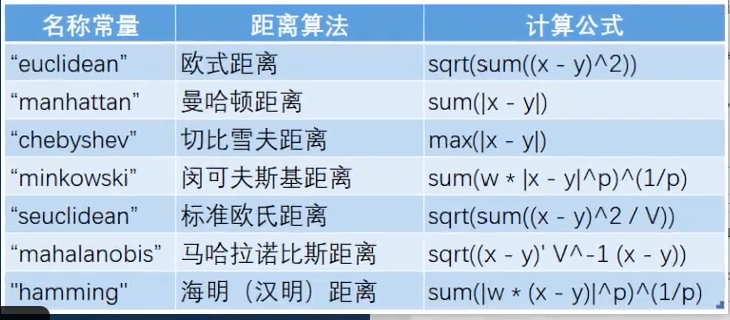

KNeighborsClassifier(metric='算法名称')

## 近邻权重的设定

KNN分类器的weights属性
* 当weights='distance'时，距离越近的数值权重越大
* uniform：不使用权重，对所有近邻简单平均
* 自定义函数：自己定义函数计算各邻居的权重


In [9]:
knn = KNeighborsClassifier(p=1, weights='distance')

gscv = GridSearchCV(knn, {'n_neighbors':range(1,20,2)}, cv=3)

x = df.iloc[:,2:20]
y = df['主分类']

gscv.fit(x,y)

pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008025,0.003579,0.007978,0.001156,1,{'n_neighbors': 1},0.885106,0.850427,0.837607,0.857714,0.020064,1
1,0.004222,0.000227,0.006101,0.000395,3,{'n_neighbors': 3},0.885106,0.850427,0.803419,0.846318,0.033475,8
2,0.003436,0.000113,0.006020,0.000559,5,{'n_neighbors': 5},0.868085,0.858974,0.816239,0.847766,0.022601,7
3,0.003739,0.000591,0.005491,0.000109,7,{'n_neighbors': 7},0.872340,0.858974,0.820513,0.850609,0.021970,2
4,0.003156,0.000075,0.005493,0.000178,9,{'n_neighbors': 9},0.859574,0.858974,0.811966,0.843505,0.022303,10
5,0.003046,0.000121,0.005340,0.000019,11,{'n_neighbors': 11},0.859574,0.858974,0.816239,0.844929,0.020288,9
6,0.002983,0.000078,0.005535,0.000093,13,{'n_neighbors': 13},0.859574,0.863248,0.824786,0.849203,0.017330,3
7,0.003095,0.000188,0.005762,0.000252,15,{'n_neighbors': 15},0.859574,0.863248,0.824786,0.849203,0.017330,3
8,0.003698,0.000801,0.006518,0.000651,17,{'n_neighbors': 17},0.859574,0.863248,0.824786,0.849203,0.017330,3
9,0.003046,0.000104,0.005871,0.000139,19,{'n_neighbors': 19},0.855319,0.863248,0.824786,0.847784,0.016581,6


# 模型准确率的评价标准

### 准确率
在样本分布不平衡的数据集中，**正确数/样本总数**的方法存在缺陷

### 召回率
例子：**正确识别的罪犯/罪犯总数**

### 精确率
例子：**正确识别的罪犯/实际抓捕人数（无论是否被冤枉）**

### F1 Score

**2x精确率x召回率/（精确率+召回率）

In [10]:
df.head()

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,妙蛙种子,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,49,49,0.7,45,65,65,45,6.9
1,妙蛙草,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,62,63,1.0,60,80,80,60,13.0
2,妙蛙花,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,100,123,2.0,80,122,120,80,100.0
3,小火龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,52,43,0.6,39,60,50,65,8.5
4,火恐龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,64,58,1.1,58,80,65,80,19.0


In [13]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

df_train, df_test = train_test_split(df, test_size=0.2, random_state=127)

x=df_train.iloc[:,2:20]
y=df_train['主分类']

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
model = knn.fit(x,y)

y_predict = model.predict(df_test.iloc[:,2:20])

metrics.accuracy_score(df_test['主分类'],y_predict)

0.8936170212765957

#### 对于多分类的数据集，需要分别算出每一类的召回率、精确率和F1分值

算出所有召回率，取平均值
1. 简单平均
2. 加权平均

sklearn中有三种平均算法：macro, micro, weighted

In [14]:
# 召回率
metrics.recall_score(df_test['主分类'],y_predict, average='weighted')


0.8936170212765957

In [18]:
# 精确率
metrics.precision_score(df_test['主分类'],y_predict,average='weighted')


0.908451536643026

In [17]:
# F1分值
metrics.f1_score(df_test['主分类'],y_predict,average='weighted')

0.8967465425915644

# 使用knn回归

In [19]:
from sklearn.neighbors import KNeighborsRegressor

#### KNN算法优化效率
1. brute，暴力法，计算所有距离
2. kd_tree，KD树算法优化效率
3. ball_tree，球面树算法优化效率
4. auto，根据数据集特点自动选择算法